# S1 Coursework - Part F

In [18]:
import numpy as np
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(10)

# Import overall distribution which is a combination of the signal and background distributions
from Stats_Analysis import Signal_Background

## Load base class (Distribution)

In [2]:
# Parameters for Crystal Ball distribution
mean = 3
sigma = 0.3
beta = 1
m = 1.4

# Parameters for Exponential Decay distribution
lamb = 0.3

# Parameters for Normal distribution
mean_b = 0
sigma_b = 2.5

# Parameters for fraction of signal
f = 0.6

# Parameters
x_lower_trunc = 0
x_upper_trunc = 5
y_lower_trunc = 0
y_upper_trunc = 10

# Parameters in a table
print("Overall Distribution Parameters")

parameters = {
    "Part": ["Signal", "Signal", "Signal", "Signal", "Signal", "Background", "Background", "Background", "Overall", "Truncation",  "Truncation",  "Truncation",  "Truncation"],
    "Distribution": ["Crystal Ball", "Crystal Ball", "Crystal Ball", "Crystal Ball", "Exponential Decay", "Uniform", "Normal", "Normal", '', "Truncation",  "Truncation",  "Truncation",  "Truncation"],
    "Parameter": ["Mean", "Sigma", "Beta", "M", "Lambda", "N/A", "Mean", "Sigma", "Fraction" ,"X Lower", "X Upper", "Y Lower", "Y Upper"],
    "Value": [mean, sigma, beta, m, lamb,'N/A', mean_b, sigma_b, f,  x_lower_trunc, x_upper_trunc, y_lower_trunc, y_upper_trunc]
}
df = pd.DataFrame(parameters)
print(df.to_markdown(index=False))

# Declare the overall distribution with parameters
overall = Signal_Background(mean, sigma, beta, m, lamb, mean_b, sigma_b, f, x_lower_trunc, x_upper_trunc, y_lower_trunc, y_upper_trunc)

Overall Distribution Parameters
| Part       | Distribution      | Parameter   | Value   |
|:-----------|:------------------|:------------|:--------|
| Signal     | Crystal Ball      | Mean        | 3       |
| Signal     | Crystal Ball      | Sigma       | 0.3     |
| Signal     | Crystal Ball      | Beta        | 1       |
| Signal     | Crystal Ball      | M           | 1.4     |
| Signal     | Exponential Decay | Lambda      | 0.3     |
| Background | Uniform           | N/A         | N/A     |
| Background | Normal            | Mean        | 0       |
| Background | Normal            | Sigma       | 2.5     |
| Overall    |                   | Fraction    | 0.6     |
| Truncation | Truncation        | X Lower     | 0       |
| Truncation | Truncation        | X Upper     | 5       |
| Truncation | Truncation        | Y Lower     | 0       |
| Truncation | Truncation        | Y Upper     | 10      |
Maximum PDF value found: 0.21804724534774383


## Part E
### Bootstrap Analysis - SWeights

1. At **first** the analysis procedure is run using sWeights on a **single generated samples of 10,000** to show the procedure works 
2. Afterward it is preformed for every toy across the multiple bootstrap samples

#### Analysis Procedure
1. **Extended Maximum Likelihood Fit in just the X Dimension**
- First `iminuits` **Extended MLE** method is applied to only the X dimnesion of the samples
- This effectively fits for the **Marginal PDF in X**, which was shown in Part C
- Fitting Parameters: 
    - **Signal Component in X**: Crystal Ball
        - Parameters: Mean, Sigma, Beta, m
    - **Background Component in Y**: Uniform
        - Parameters: N/A
    - **Overall Ratiom**
        - Parameters: Fraction, No. Expected Samples
##### Requires
- Initial Starting Parameters for these; [mu, sigma, beta, m, f, N]
- Limitations on these parameters

    | Parameter   | Limit Range              |
    |-------------|--------------------------|
    | `sigma`     | (1e-3, None)            | 
    | `beta`      | (1e-2, None)            | 
    | `m`         | (1.01, None)            | 
    | `f`         | (0, 1)                  | 
    | `No. Samples`| (1e-3, None)           | 

2. **Determine Sweights of Signal and Background to Each Data Points**
- After fitting the Marginal PDF in X, the `sWeights` method is applied to assign statistical weights to each data point.
- These weights account for the probability of a data point belonging to the Signal or Background distribution, given the fitted parameters.

3. **Apply Sweights to the Y Dimension**
- Apply the weights calculated in Step 2, to the whole data set (both X,Y for each data point)
- This adjusts the Y dimension data points to represent their Signal (and background) contributions, by scaling data point’s significance
- At no point has any information been used about the Y dimension

4. **Binned Maximium Likelihood Fit for just the Signal Distribution in the Y**
- Using all Y dimension data points from the sample but with adjusted significance from sweights
- Apply a Binned MLE fit to fit for the Signal Distribution in Y: Exponential
    - Parameters: Lambda

    | Parameter   | Limit Range              |
    |-------------|--------------------------|
    | `Lambda`      | (1e-3, None)            | 

- At no points has any information about the background distribution (Normal) in Y has be used or fitted

#### Overall
- Requires initial starting parameters for: **[mu, sigma, beta, m, f, lambda, N]**
- Does not require or use any information or starting parameters for: [mean_b, sigma_b]

### Calculations below
- Below this is performed on single samples to show the method works
- **A final sumary table of results is given at the end of the analysis**

More documentation on this method can be found: here









Step 1 - Iminuit Extended MLE: X Dimension Fitting Results
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.375e+05                 │              Nfcn = 184              │
│ EDM = 9.76e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬────

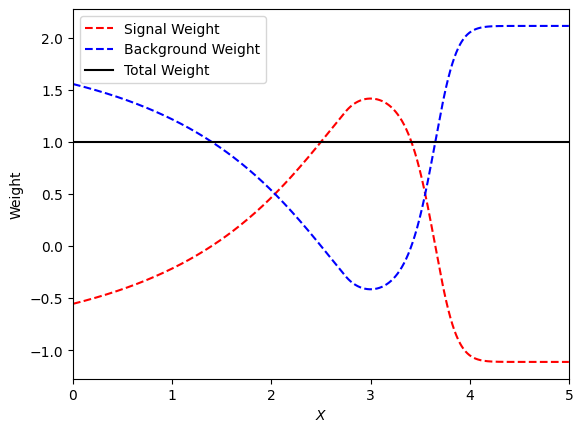

Step 3 - Sweights: Project to Signal Distribution in Y


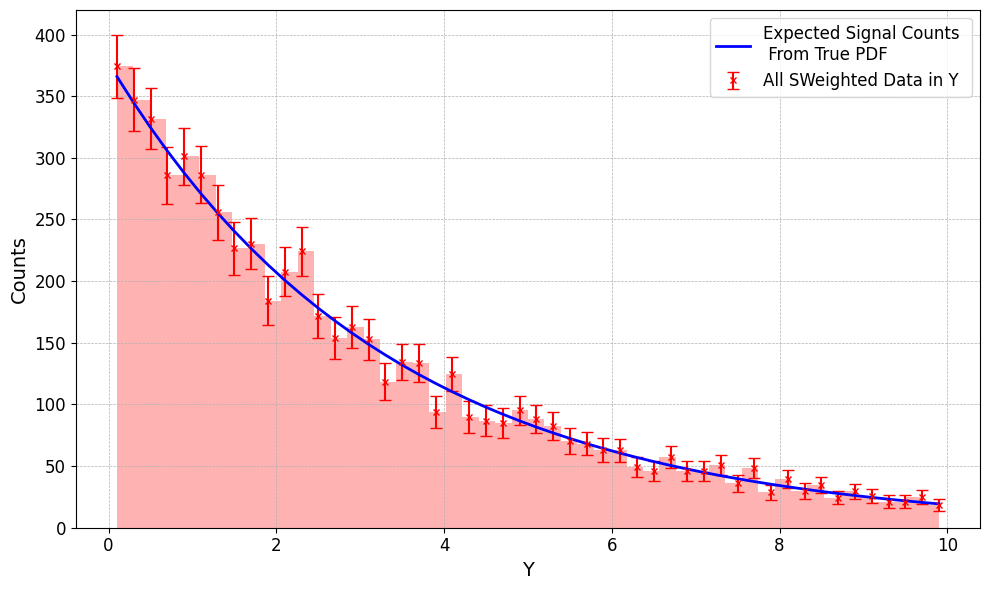

Step 4 - Binned MLE: Signal in Y Dimension Fitting Results
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 46.65 (χ²/ndof = 1.0)      │              Nfcn = 19               │
│ EDM = 5.07e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬─────

({'mu': 3.0005641168340818,
  'sigma': 0.2931366822925622,
  'beta': 0.8682716173766336,
  'm': 1.7873509778577465,
  'f': 0.5971253923741823,
  'N': 10000.000018948022,
  'lamb': 0.2991359933019667},
 {'mu': 0.008285223498614288,
  'sigma': 0.00796642227603761,
  'beta': 0.06636419571167729,
  'm': 0.30116210633898033,
  'f': 0.012497706989108126,
  'N': 100.0005501025862,
  'lamb': 0.005466061696880131})

In [3]:
# generate samples from distribution for fitting
generated_samples =  overall.accept_reject_sample(desired_samples= 10000, poisson= False, save_to_class=False)


# Starting parameters for fitting [mu, sigma, beta, m, f, lambda, N]
initial_params = [3.1, 0.4, 1.1, 1.5, 0.7, 0.4, 10000]
overall.fit_params_sWeights(initial_params, generated_samples, print_results = True)

## Fitting using Sweights for all Bootstraps
- The analysis above is then preformed for all toys in all bootstrap sets created within Part d
- The `param_bootstrap_sWeights_fit` method uses the `fit_params_sWeights` method under the hood as seen above
- It imports samples from an **Input Directory**: `Bootstrap/Samples`
- Exports fitted parameters and there hessian errors to an **Output Directory**: `Bootstrap/SWeights/Results`

#### Validation Check
- `Sweights` can an inbuilt validation check to check for **normalised PDFs** and **Unitary Matrix**
- This can been run once while using this and validation show correct results
- It has been turned off to stop clustering outputs but can be turned back on using `norm_check = True`

#### Warning of Non-Convergence
- Especially for smaller sample sizes `iminuit` may struggle to converge on an **Maximium Likelihood Estimate** for either the first fit in X (Extended Unbinned) or second fit in Signal Y (Binned).
- For each bootstrap the toy that did not converge will be declared and a summary of what fraction will be returned
- Estimates that failed will be stored as `np.nan`

In [4]:
initial_params_bootstrap = [3.1, 0.4, 1.1, 1.5, 0.7, 0.4]

overall.param_bootstrap_sWeights_fit(initial_params_bootstrap, norm_check = False,  input_directory="Bootstrap/Samples", output_directory="Bootstrap/sWeights/Results")

Processing bootstrap samples of size 10000 using sWeights...
In total 0 samples did not converge out of 250.
Results saved to Bootstrap/sWeights/Results/ParamResults_No_250_BaseSize_10000.npy
 
Processing bootstrap samples of size 1000 using sWeights...


/Users/jacobtutt/Desktop/MPhil_DIS/S1/Coursework_S1/coursework_S1_venvs/coursework_S1_venv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:11332: RuntimeWarning: overflow encountered in power
  return ((m/beta)**m * np.exp(-beta**2 / 2.0) *
/Users/jacobtutt/Desktop/MPhil_DIS/S1/Coursework_S1/coursework_S1_venvs/coursework_S1_venv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:11332: RuntimeWarning: invalid value encountered in multiply
  return ((m/beta)**m * np.exp(-beta**2 / 2.0) *
/Users/jacobtutt/Desktop/MPhil_DIS/S1/Coursework_S1/coursework_S1_venvs/coursework_S1_venv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:11364: RuntimeWarning: overflow encountered in power
  return ((m/beta)**m * np.exp(-beta**2 / 2.0) *
/Users/jacobtutt/Desktop/MPhil_DIS/S1/Coursework_S1/coursework_S1_venvs/coursework_S1_venv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:11364: RuntimeWarning: invalid value encountered in multiply
  return 

Sample 190 (size 1000) did not converge
Minimisation did not converge
In total 1 samples did not converge out of 250.
Results saved to Bootstrap/sWeights/Results/ParamResults_No_250_BaseSize_1000.npy
 
Processing bootstrap samples of size 5000 using sWeights...
In total 0 samples did not converge out of 250.
Results saved to Bootstrap/sWeights/Results/ParamResults_No_250_BaseSize_5000.npy
 
Processing bootstrap samples of size 500 using sWeights...
Sample 37 (size 500) did not converge
Minimisation did not converge
Sample 50 (size 500) did not converge
Minimisation did not converge
Sample 69 (size 500) did not converge
Minimisation did not converge
Sample 78 (size 500) did not converge
Minimisation did not converge
Sample 82 (size 500) did not converge
Minimisation did not converge
Sample 85 (size 500) did not converge
Minimisation did not converge
Sample 89 (size 500) did not converge
Minimisation did not converge
Sample 119 (size 500) did not converge
Minimisation did not converge
Sa

array([[[2.97325482e+00, 3.20643106e-01, 1.19928176e+00, ...,
         6.29320194e-01, 2.48908036e+03, 3.10852313e-01],
        [2.99155509e+00, 2.95655984e-01, 1.07945985e+00, ...,
         6.09462793e-01, 2.57701963e+03, 2.78828753e-01],
        [3.02162176e+00, 2.81903615e-01, 9.43532606e-01, ...,
         6.25639520e-01, 2.42801330e+03, 3.02953837e-01],
        ...,
        [3.03226184e+00, 2.75623655e-01, 8.69893954e-01, ...,
         5.35562581e-01, 2.43373321e+03, 2.86066692e-01],
        [2.99666379e+00, 2.95172717e-01, 9.06790802e-01, ...,
         6.38725718e-01, 2.51761789e+03, 2.88781403e-01],
        [3.01302823e+00, 2.84774100e-01, 1.20548349e+00, ...,
         5.82439424e-01, 2.50199740e+03, 2.95636910e-01]],

       [[1.46573229e-02, 1.41427248e-02, 8.28965520e-02, ...,
         2.29730847e-02, 4.98914862e+01, 1.08211355e-02],
        [1.46685080e-02, 1.38997863e-02, 7.07586991e-02, ...,
         2.22650401e-02, 5.07645505e+01, 1.04113431e-02],
        [1.44115175e-02, 

## Analysis on Sweights Bootstrap Results
- This is an identical analysis to those preformed in Part E but on the results from the Sweights fitting
- The results from this bootstrap are visualised by the `param_bootstrap_sWeights_analysis` method 
- It imports fitted parameters from an **Input Directory**: `Bootstrap/SWeights/Results`
- Exports plots to an **Output Directory**: `Bootstrap/SWeights/Plots`

#### Plots Produced
##### Histograms
1. Each parameter across bootstrap samples.
    - value, error, and pull histograms are produced
##### Bias and Uncertainty against sample size 
2. Bias and Uncertainty trends vs. sample size for each parameter.
##### Adrian Plots
3. 'Adrian' Pull distributions for each parameter across all samples.

#### Returns Dictionary of Summary Results
For each bootstrap/ sample size: 
- Values Mean
- Values Std
- Values Bias
- Uncertainty Mean
- Uncertainty Std 
- Pull Mean
- Pull Mean Error
- Pull Std
- Pull Std Error

#### Only the Bias and Uncertainty against sample size plots are displayed in the notebook - the rest can be found in Bootstrap/sWeights/Plots

For more documentation on the method see: here

Processing sWeights fitted sample size: 1000
Histogram of Value saved in Bootstrap/sWeights/Plots/Value_Histograms
Histogram of Error saved in Bootstrap/sWeights/Plots/Error_Histograms
Histogram of Pull saved in Bootstrap/sWeights/Plots/Pull_Histograms
Processing sWeights fitted sample size: 10000
Histogram of Value saved in Bootstrap/sWeights/Plots/Value_Histograms
Histogram of Error saved in Bootstrap/sWeights/Plots/Error_Histograms
Histogram of Pull saved in Bootstrap/sWeights/Plots/Pull_Histograms
Processing sWeights fitted sample size: 5000
Histogram of Value saved in Bootstrap/sWeights/Plots/Value_Histograms
Histogram of Error saved in Bootstrap/sWeights/Plots/Error_Histograms
Histogram of Pull saved in Bootstrap/sWeights/Plots/Pull_Histograms
Processing sWeights fitted sample size: 500
Histogram of Value saved in Bootstrap/sWeights/Plots/Value_Histograms
Histogram of Error saved in Bootstrap/sWeights/Plots/Error_Histograms
Histogram of Pull saved in Bootstrap/sWeights/Plots/Pull

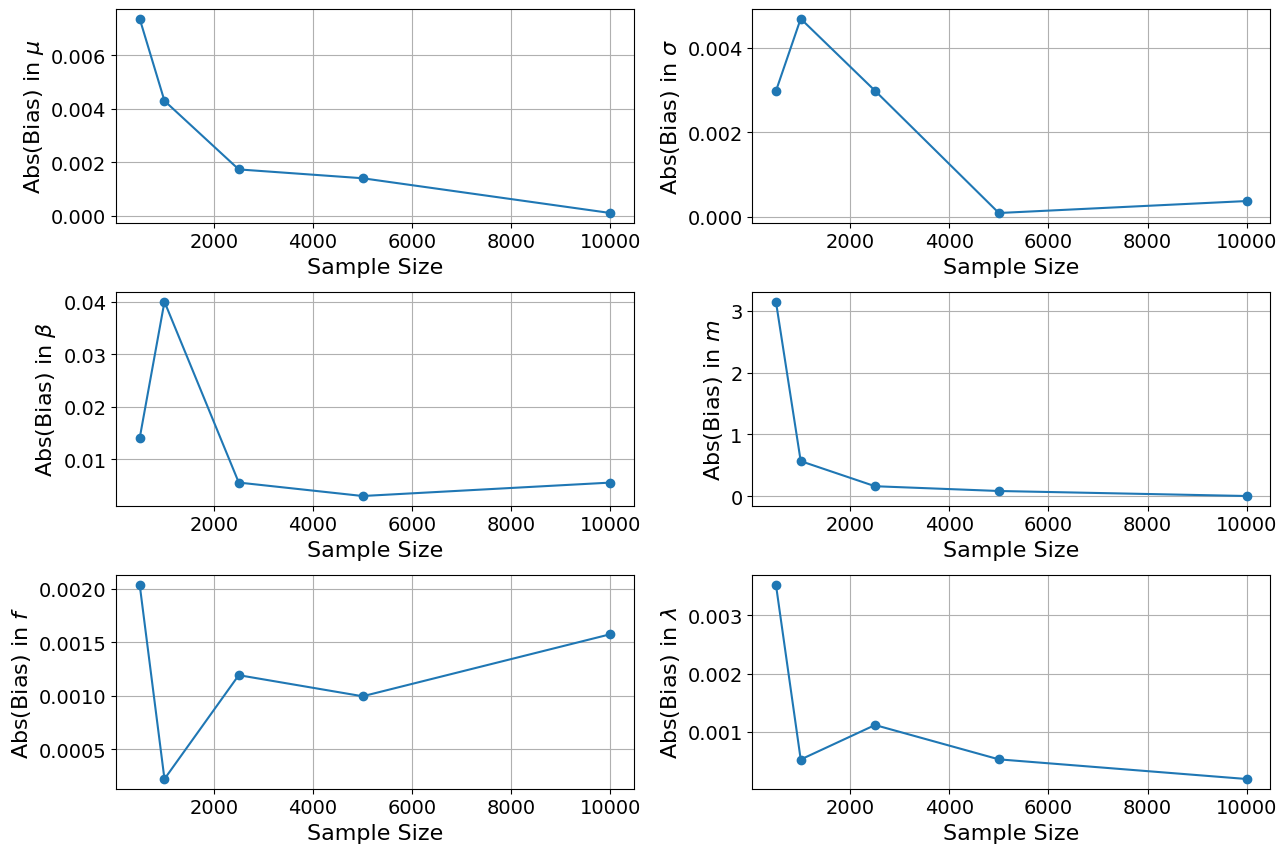

Bias vs Sample Size plot saved in Bootstrap/sWeights/Plots/Trends_with_Samples_Size


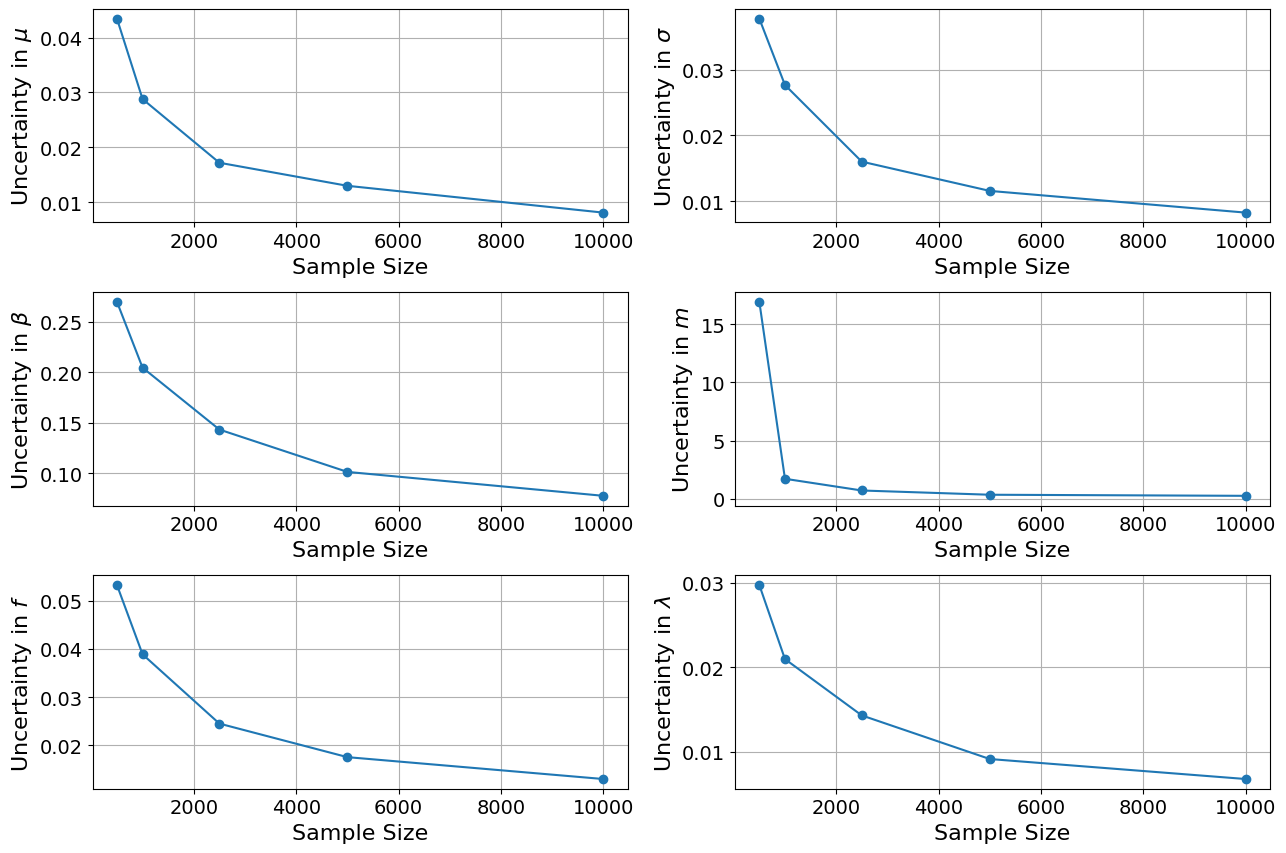

Error vs Sample Size plot saved in Bootstrap/sWeights/Plots/Trends_with_Samples_Size
Saved pull distribution plot for sample size 1000 in Bootstrap/sWeights/Plots/Pull_Plots/Pull_Distributions_1000.png
Saved pull distribution plot for sample size 10000 in Bootstrap/sWeights/Plots/Pull_Plots/Pull_Distributions_10000.png
Saved pull distribution plot for sample size 5000 in Bootstrap/sWeights/Plots/Pull_Plots/Pull_Distributions_5000.png
Saved pull distribution plot for sample size 500 in Bootstrap/sWeights/Plots/Pull_Plots/Pull_Distributions_500.png
Saved pull distribution plot for sample size 2500 in Bootstrap/sWeights/Plots/Pull_Plots/Pull_Distributions_2500.png


In [8]:
sweights_bootstrap_results = overall.param_bootstrap_sWeights_analysis(input_directory="Bootstrap/sWeights/Results", output_directory="Bootstrap/sWeights/Plots")

## Table of Results from Bootstrap sWeight Analysis

In [10]:
# Print summary table - sweights_bootstrap_results
columns = ["Bootstrap Size", "Metric", "Mean", "Sigma", "Beta", "m", "Lambda", "Mean_b", "Sigma_b", "Fraction", "No. Expected"]
rows = []

for size, summary_metrics in sorted(sweights_bootstrap_results.items()): 
    
    for metric_name, values in summary_metrics.items():
        rounded_values = [round(v, 4) for v in values]
        rows.append([size, metric_name] + rounded_values)
print(tabulate(rows, headers=columns, tablefmt="grid"))

+------------------+-----------------+---------+---------+---------+----------+----------+-----------+-----------+
|   Bootstrap Size | Metric          |    Mean |   Sigma |    Beta |        m |   Lambda |    Mean_b |   Sigma_b |
+==================+=================+=========+=========+=========+==========+==========+===========+===========+
|              500 | Values_Mean     |  3.0074 |  0.297  |  0.986  |   4.5493 |   0.602  |  499.491  |    0.3035 |
+------------------+-----------------+---------+---------+---------+----------+----------+-----------+-----------+
|              500 | Values_Std      |  0.0435 |  0.0377 |  0.2698 |  16.908  |   0.0533 |   23.646  |    0.0297 |
+------------------+-----------------+---------+---------+---------+----------+----------+-----------+-----------+
|              500 | Values_Bias     |  0.0074 | -0.003  | -0.014  |   3.1493 |   0.002  |   -0.5085 |    0.0035 |
+------------------+-----------------+---------+---------+---------+----------+-

## Comparison of Normal vs sWeights Bootstrap for Lambda (Bias and Uncertanity)

- First the results for the normal Iminuit fitting from Part_f is rerun from the previous notebook so the results are accesible here

Processing sample size: 1000
Histogram of Value saved in Bootstrap/Plots/Value_Histograms
Histogram of Error saved in Bootstrap/Plots/Error_Histograms
Histogram of Pull saved in Bootstrap/Plots/Pull_Histograms
Processing sample size: 10000
Histogram of Value saved in Bootstrap/Plots/Value_Histograms
Histogram of Error saved in Bootstrap/Plots/Error_Histograms
Histogram of Pull saved in Bootstrap/Plots/Pull_Histograms
Processing sample size: 5000
Histogram of Value saved in Bootstrap/Plots/Value_Histograms
Histogram of Error saved in Bootstrap/Plots/Error_Histograms
Histogram of Pull saved in Bootstrap/Plots/Pull_Histograms
Processing sample size: 500
Histogram of Value saved in Bootstrap/Plots/Value_Histograms
Histogram of Error saved in Bootstrap/Plots/Error_Histograms
Histogram of Pull saved in Bootstrap/Plots/Pull_Histograms
Processing sample size: 2500
Histogram of Value saved in Bootstrap/Plots/Value_Histograms
Histogram of Error saved in Bootstrap/Plots/Error_Histograms
Histogram

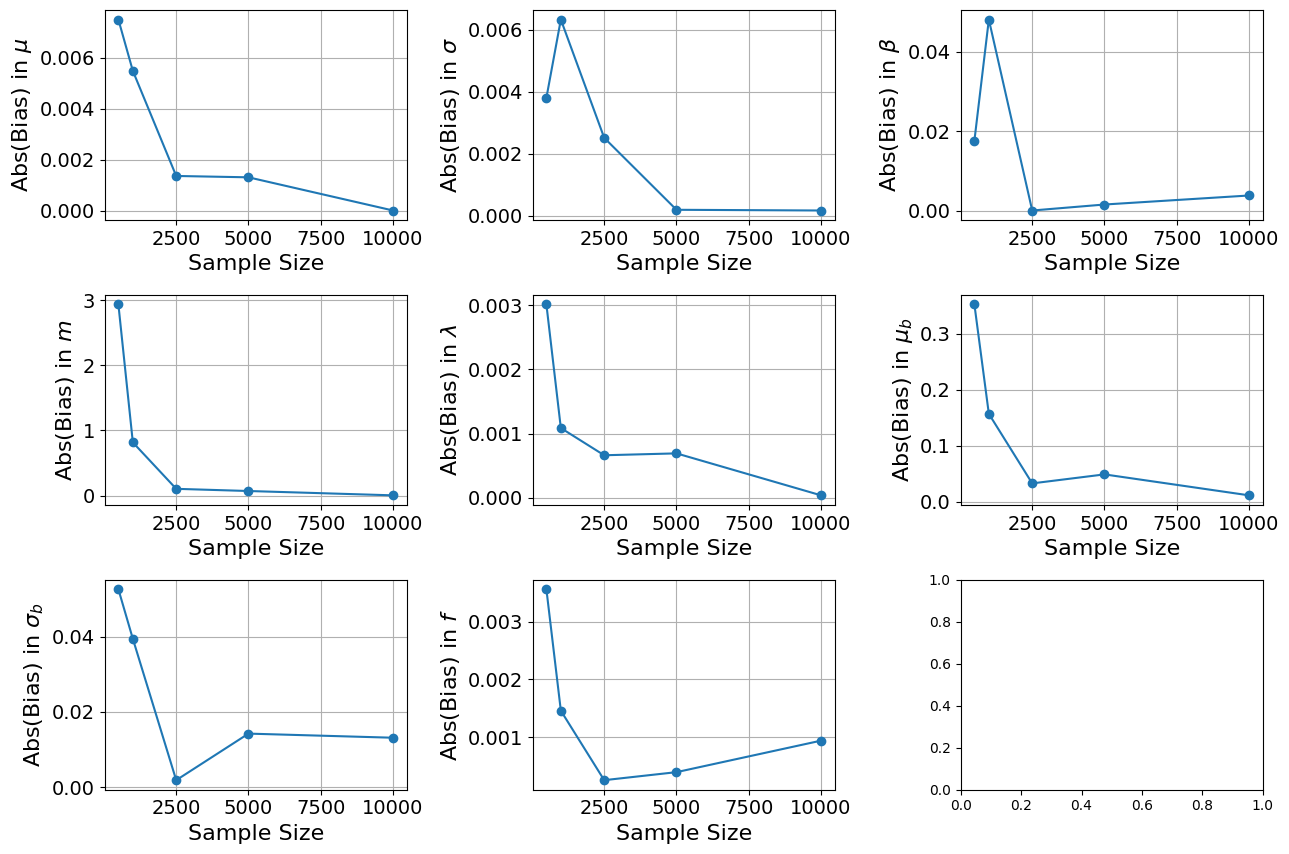

Bias vs Sample Size plot saved in Bootstrap/Plots/Trends_with_Samples_Size


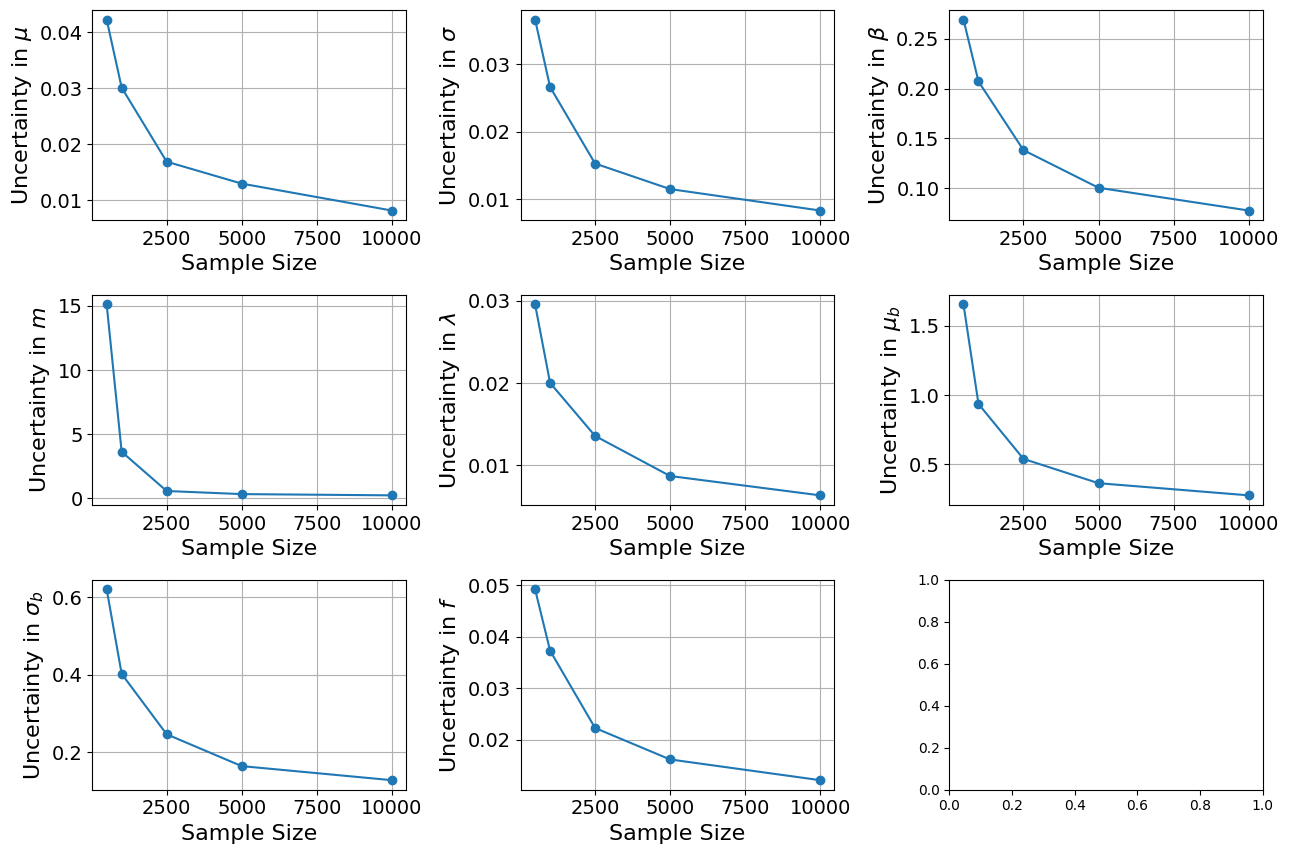

Error vs Sample Size plot saved in Bootstrap/Plots/Trends_with_Samples_Size
Saved pull distribution plot for sample size 1000 in Bootstrap/Plots/Pull_Plots/Pull_Distributions_1000.png
Saved pull distribution plot for sample size 10000 in Bootstrap/Plots/Pull_Plots/Pull_Distributions_10000.png
Saved pull distribution plot for sample size 5000 in Bootstrap/Plots/Pull_Plots/Pull_Distributions_5000.png
Saved pull distribution plot for sample size 500 in Bootstrap/Plots/Pull_Plots/Pull_Distributions_500.png
Saved pull distribution plot for sample size 2500 in Bootstrap/Plots/Pull_Plots/Pull_Distributions_2500.png


In [ ]:
# Run analysis
bootstrap_results = overall.param_bootstrap_analysis(input_directory="Bootstrap/Param_Results", output_directory="Bootstrap/Plots")

#### The full results from Normal Fitting
- Stored in: **bootstrap_results**

#### The full results from sWeights Fitting
- Stored in: **sweights_bootstrap_results**


Bias and Uncertainties are extracted and plotted against each other

In [38]:
sample_sizes = np.array(sorted(map(int, bootstrap_results.keys())))

# Extract the corresponding arrays
normal_values_bias = np.array([bootstrap_results[size]['Values_Bias'][4] for size in sample_sizes])
normal_values_std = np.array([bootstrap_results[size]['Values_Std'][4] for size in sample_sizes])
sweights_values_bias = np.array([sweights_bootstrap_results[size]['Values_Bias'][6] for size in sample_sizes])
sweights_values_std = np.array([sweights_bootstrap_results[size]['Values_Std'][6] for size in sample_sizes])

#### Absolute Bias vs Sample Size for Both Methods

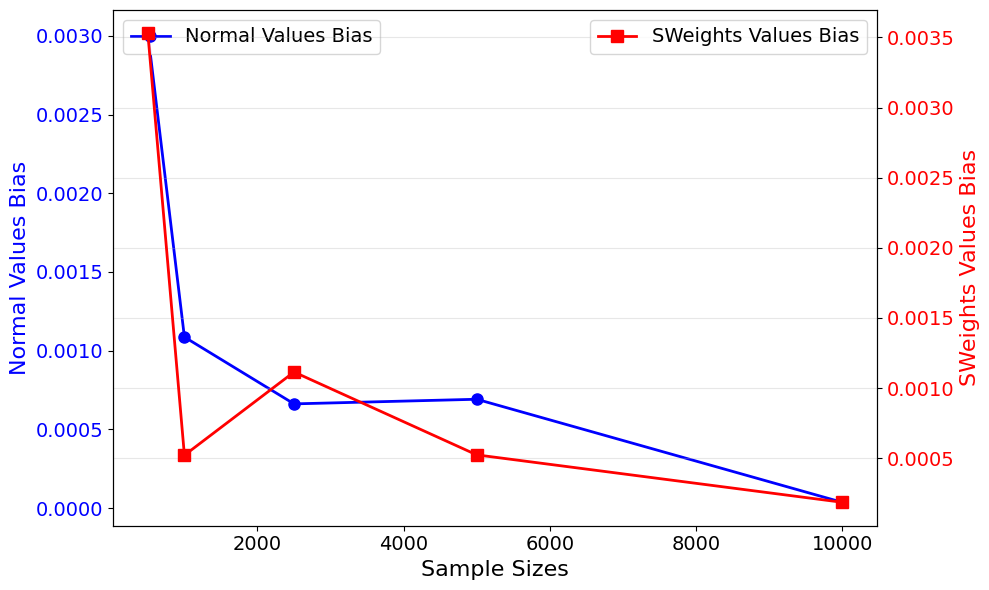

In [ ]:
# Formatting variables
figsize = (10, 6) 
linewidth = 2   
markersize = 8   
fontsize_title = 18  
fontsize_labels = 16  
fontsize_ticks = 14     
fontsize_legend = 14  
color_normal = 'b'  
color_sweights = 'r'    

fig, ax1 = plt.subplots(figsize=figsize)

# Plot for normal absolute values bias
ax1.plot(sample_sizes, abs(normal_values_bias), f'{color_normal}-o', label="Normal Method Bias", linewidth=linewidth, markersize=markersize)
ax1.set_xlabel('Sample Sizes', fontsize=fontsize_labels)
ax1.set_ylabel('Normal Method Bias', color=color_normal, fontsize=fontsize_labels)
ax1.tick_params(axis='y', labelcolor=color_normal, labelsize=fontsize_ticks)
ax1.tick_params(axis='x', labelsize=fontsize_ticks)

# Plot for sweights absolute values bias
ax2 = ax1.twinx()
ax2.plot(sample_sizes, abs(sweights_values_bias), f'{color_sweights}-s',label="SWeights Method Bias", linewidth=linewidth, markersize=markersize)
ax2.set_ylabel('SWeights Method Bias', color=color_sweights, fontsize=fontsize_labels)
ax2.tick_params(axis='y', labelcolor=color_sweights, labelsize=fontsize_ticks)


plt.grid(alpha=0.3)
ax1.legend(loc='upper left', fontsize=fontsize_legend)
ax2.legend(loc='upper right', fontsize=fontsize_legend)

# Adjust layout and display
plt.tight_layout()
plt.show()

#### Uncertainty of Fit vs Sample Size for Both Methods

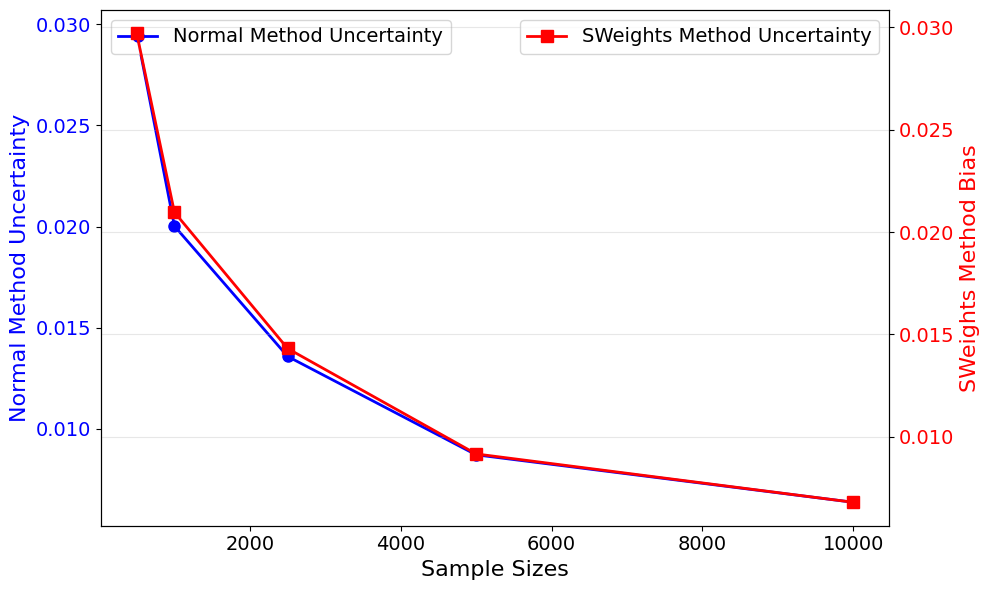

In [42]:
# Formatting variables
figsize = (10, 6) 
linewidth = 2   
markersize = 8   
fontsize_title = 18  
fontsize_labels = 16  
fontsize_ticks = 14     
fontsize_legend = 14  
color_normal = 'b'  
color_sweights = 'r'    

fig, ax1 = plt.subplots(figsize=figsize)

# Plot for normal absolute values uncertainty
ax1.plot(sample_sizes, abs(normal_values_std), f'{color_normal}-o', label="Normal Method Uncertainty", linewidth=linewidth, markersize=markersize)
ax1.set_xlabel('Sample Sizes', fontsize=fontsize_labels)
ax1.set_ylabel('Normal Method Uncertainty', color=color_normal, fontsize=fontsize_labels)
ax1.tick_params(axis='y', labelcolor=color_normal, labelsize=fontsize_ticks)
ax1.tick_params(axis='x', labelsize=fontsize_ticks)

# Plot for sweights absolute values uncertainty
ax2 = ax1.twinx()
ax2.plot(sample_sizes, abs(sweights_values_std), f'{color_sweights}-s',label="SWeights Method Uncertainty", linewidth=linewidth, markersize=markersize)
ax2.set_ylabel('SWeights Method Bias', color=color_sweights, fontsize=fontsize_labels)
ax2.tick_params(axis='y', labelcolor=color_sweights, labelsize=fontsize_ticks)

plt.grid(alpha=0.3)
ax1.legend(loc='upper left', fontsize=fontsize_legend)
ax2.legend(loc='upper right', fontsize=fontsize_legend)

# Adjust layout and display
plt.tight_layout()
plt.show()